<img align="center" src="http://sydney.edu.au/images/content/about/logo-mono.jpg">
<h1 align="center" style="margin-top:10px">QBUS 6810 
<h1 align="center" style="margin-top:10px">Statistical Learning and Data Mining </h1>
<h3 align="center" style="margin-top:10px">Group 156, Semester 2, 2019 </h3>
<h1 align="center" style="margin-top:10px">     </h1>
    
<h2 align="center" style="margin-top:10px">Group assignment</h2>

    
<br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
import nltk
import folium
import plotly.express as px
import xgboost as xgb
import lightgbm as lgb
import statlearning
import plotly.express as px
import geopy
import mlxtend
from collections import Counter
from geopy.geocoders import GoogleV3
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from statlearning import plot_dists
from statlearning import plot_regressions
from folium.plugins import HeatMap
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import RidgeCV
from statlearning import plot_coefficients
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from statlearning import plot_feature_importance
from datetime import datetime
import math
nltk.download('stopwords')
nltk.download('wordnet')
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\36381\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\36381\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Plot settings
sns.set_context('notebook') # optimises figures for notebook display
sns.set_style('ticks') # set default plot style
crayon = ['#4E79A7','#F28E2C','#E15759','#76B7B2','#59A14F', 
          '#EDC949','#AF7AA1','#FF9DA7','#9C755F','#BAB0AB']
sns.set_palette(crayon) # set custom color scheme
%matplotlib inline
plt.rcParams['figure.figsize'] = (9, 6)

In [3]:
pd.set_option('max_columns',300)
pd.set_option('max_row',100)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [4]:
# Load data
data_train = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")

In [5]:
data_test = data_test.drop(columns = 'id')

# 1. Data Cleansing

In [6]:
# Check the number of null values of data_train
data_train.isnull().sum().sort_values(ascending=False)

host_acceptance_rate                            9838
square_feet                                     9779
monthly_discount                                9299
weekly_discount                                 8940
notes                                           5538
host_response_rate                              4566
host_response_time                              4566
host_about                                      4363
house_rules                                     3987
access                                          3892
interaction                                     3878
neighborhood_overview                           3438
transit                                         3369
security_deposit_perc                           3303
review_scores_value                             2962
review_scores_location                          2960
review_scores_checkin                           2959
review_scores_accuracy                          2957
review_scores_communication                   

Text(0.5, 1.0, 'Percent missing data by feature')

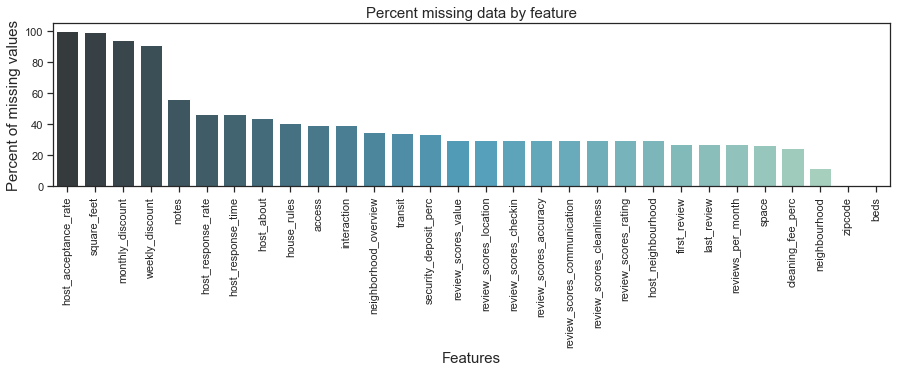

In [7]:
# visualizated the miss ration in the data_train
data_train_na = (data_train.isnull().sum() / len(data_train)) * 100
data_train_na = data_train_na.drop(data_train_na[data_train_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_train_na})

f, ax = plt.subplots(figsize=(15, 3))
plt.xticks(rotation='90')
sns.barplot(x=data_train_na.index, y=data_train_na, palette='GnBu_d')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [8]:
# Drop the high missing ratio data
data_train = data_train.drop(columns=['host_acceptance_rate',
                                    "square_feet"])
data_test = data_test.drop(columns=['host_acceptance_rate',
                                    "square_feet"])

### 1.1 Deal with missing value

#### code from https://chrisalbon.com/python/data_wrangling/geocoding_and_reverse_geocoding/

In [9]:
"""----------------------------------------fill it with proper values--------------------------------------------------"""

data_train['notes'] = data_train['notes'].fillna('0')
data_test['notes'] = data_test['notes'].fillna('0')
data_train['host_response_rate'] = data_train['host_response_rate'].fillna('0%')
data_test['host_response_rate'] = data_test['host_response_rate'].fillna('0%')

"""----------------------------------------fill it with statistical indicator--------------------------------------------------"""

data_train['monthly_discount'] = data_train['monthly_discount'].fillna(0)
data_train['weekly_discount'] = data_train['weekly_discount'].fillna(0)
data_train['security_deposit_perc'] = data_train['security_deposit_perc'].fillna(0)
data_train['review_scores_value'] = data_train['review_scores_value'].fillna(data_train['review_scores_value'].mode()[0])
data_train['review_scores_location'] = data_train['review_scores_location'].fillna(data_train['review_scores_location'].mode()[0])
data_train['review_scores_checkin'] = data_train['review_scores_checkin'].fillna(data_train['review_scores_checkin'].mode()[0])
data_train['review_scores_accuracy'] = data_train['review_scores_accuracy'].fillna(data_train['review_scores_accuracy'].mode()[0])
data_train['review_scores_communication'] = data_train['review_scores_communication'].fillna(data_train['review_scores_communication'].mode()[0])
data_train['review_scores_cleanliness'] = data_train['review_scores_cleanliness'].fillna(data_train['review_scores_cleanliness'].mode()[0])
data_train['review_scores_rating'] = data_train['review_scores_rating'].fillna(data_train['review_scores_rating'].mode()[0])
data_train['reviews_per_month'] = data_train['reviews_per_month'].fillna(0)
data_train['cleaning_fee_perc'] = data_train['cleaning_fee_perc'].fillna(0)
data_train['beds'] = data_train['beds'].fillna(data_train['beds'].mode()[0])
data_train['bathrooms'] = data_train['bathrooms'].fillna(data_train['bathrooms'].mode()[0])
data_train['bedrooms'] = data_train['bedrooms'].fillna(data_train['bedrooms'].mode()[0])

data_test['monthly_discount'] = data_test['monthly_discount'].fillna(0)
data_test['weekly_discount'] = data_test['weekly_discount'].fillna(0)
data_test['security_deposit_perc'] = data_test['security_deposit_perc'].fillna(0)
data_test['review_scores_value'] = data_test['review_scores_value'].fillna(data_test['review_scores_value'].mode()[0])
data_test['review_scores_location'] = data_test['review_scores_location'].fillna(data_test['review_scores_location'].mode()[0])
data_test['review_scores_checkin'] = data_test['review_scores_checkin'].fillna(data_test['review_scores_checkin'].mode()[0])
data_test['review_scores_accuracy'] = data_test['review_scores_accuracy'].fillna(data_test['review_scores_accuracy'].mode()[0])
data_test['review_scores_communication'] = data_test['review_scores_communication'].fillna(data_test['review_scores_communication'].mode()[0])
data_test['review_scores_cleanliness'] = data_test['review_scores_cleanliness'].fillna(data_test['review_scores_cleanliness'].mode()[0])
data_test['review_scores_rating'] = data_test['review_scores_rating'].fillna(data_test['review_scores_rating'].mode()[0])
data_test['reviews_per_month'] = data_test['reviews_per_month'].fillna(0)
data_test['cleaning_fee_perc'] = data_test['cleaning_fee_perc'].fillna(0)
data_test['beds'] = data_test['beds'].fillna(data_test['beds'].mode()[0])
data_test['bathrooms'] = data_test['bathrooms'].fillna(data_test['bathrooms'].mode()[0])
data_test['bedrooms'] = data_test['bedrooms'].fillna(data_test['bedrooms'].mode()[0])



"""----------------------------------------fill it with none--------------------------------------------------"""

data_train['host_response_time'] = data_train['host_response_time'].fillna('none')
data_train['host_about'] = data_train['host_about'].fillna('none')
data_train['house_rules'] = data_train['house_rules'].fillna('none')
data_train['access'] = data_train['access'].fillna('none')
data_train['interaction'] = data_train['interaction'].fillna('none')
data_train['neighborhood_overview'] = data_train['neighborhood_overview'].fillna('none')
data_train['transit'] = data_train['transit'].fillna('none')
data_train['space'] = data_train['space'].fillna('none')
data_train['host_location'] = data_train['host_location'].fillna('none')
data_train['host_neighbourhood'] = data_train['host_neighbourhood'].fillna('none')


data_test['host_response_time'] = data_test['host_response_time'].fillna('none')
data_test['host_about'] = data_test['host_about'].fillna('none')
data_test['house_rules'] = data_test['house_rules'].fillna('none')
data_test['access'] = data_test['access'].fillna('none')
data_test['interaction'] = data_test['interaction'].fillna('none')
data_test['neighborhood_overview'] = data_test['neighborhood_overview'].fillna('none')
data_test['transit'] = data_test['transit'].fillna('none')
data_test['space'] = data_test['space'].fillna('none')
data_test['host_location'] = data_test['host_location'].fillna('none')
data_test['host_neighbourhood'] = data_test['host_neighbourhood'].fillna('none')

"""----------------------------------------fill it with function--------------------------------------------------"""

#geolocator = Nominatim(user_agent="my-application")
#for i in range(0,len(data_train)):
#    if pd.isnull(data_train.loc[i,'zipcode']):
#        lat = data_train.loc[i,'latitude']
#        lon = data_train.loc[i,'longitude']
#        location = geolocator.reverse("{},{}".format(lat,lon), timeout = 10,exactly_one=True)
#        location = location.raw
#        if "postcode" in location['address']:
#            data_train.loc[i,'zipcode']=location['address']['postcode']
#    if pd.isnull(data_train.loc[i,'city']):
#        lat = data_train.loc[i,'latitude']
#        lon = data_train.loc[i,'longitude']
#        location = geolocator.reverse("{},{}".format(lat,lon), timeout = 10,exactly_one=True)
#        location = location.raw
#        if "suburb" in location['address']:
#            data_train.loc[i,'city']=location['address']['suburb']
    #if pd.isnull(data_train.loc[i,'neighbourhood']):
    #    lat = data_train.loc[i,'latitude']
    #    lon = data_train.loc[i,'longitude']
    #    location = geolocator.reverse("{},{}".format(lat,lon), timeout = 10,exactly_one=True)
    #    location = location.raw
    #    if "neighbourhood" in location['address']:
    #        data_train.loc[i,'neighbourhood']=location['address']['neighbourhood']

# The 'geolocator.reverse' may fail if timeout 
# filling neighbourhood information is very time-consuming

"""------------------------------fill it with none if relevant information can't be found---------------------------"""            

data_train['neighbourhood'] = data_train['neighbourhood'].fillna('none')
data_train['zipcode'] = data_train['zipcode'].fillna('none')
data_train['city'] = data_train['city'].fillna('none')

data_test['neighbourhood'] = data_test['neighbourhood'].fillna('none')
data_test['zipcode'] = data_test['zipcode'].fillna('none')
data_test['city'] = data_test['city'].fillna('none')


"""----------------------------------------others --------------------------------------------------"""
now = datetime.today()
data_train['first_review'] = data_train['first_review'].fillna(now)
data_train['last_review'] = data_train['last_review'].fillna(now)
data_train['cancellation_policy'] = data_train['cancellation_policy'].fillna('strict_14_with_grace_period')
data_test['first_review'] = data_test['first_review'].fillna(now)
data_test['last_review'] = data_test['last_review'].fillna(now)
data_test['cancellation_policy'] = data_test['cancellation_policy'].fillna('strict_14_with_grace_period')

In [10]:
#Check missing values again
data_train.isnull().sum().sort_values(ascending=False)

price                                           0
amenities                                       0
host_verifications                              0
host_identity_verified                          0
street                                          0
neighbourhood                                   0
neighbourhood_cleansed                          0
city                                            0
zipcode                                         0
smart_location                                  0
latitude                                        0
longitude                                       0
is_location_exact                               0
property_type                                   0
room_type                                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
host_total_listings_count                       0


In [11]:
data_test.isnull().sum().sort_values(ascending=False)

reviews_per_month                               0
calculated_host_listings_count_shared_rooms     0
host_verifications                              0
host_identity_verified                          0
street                                          0
neighbourhood                                   0
neighbourhood_cleansed                          0
city                                            0
zipcode                                         0
smart_location                                  0
latitude                                        0
longitude                                       0
is_location_exact                               0
property_type                                   0
room_type                                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
host_total_listings_count                       0


### 1.2 Deal with speical dtype

In [12]:
# Price(get rid of '$' symbol)
data_train['price'] = data_train['price'].apply(lambda x : float(x.split('$')[1].replace(',','')))
y_train = data_train['price']
y_train.columns = ['price']
data_train = data_train.drop(columns = 'price')

In [13]:
#host_response_rate(get rid of '%' symbol)
data_train['host_response_rate'] = data_train['host_response_rate'].apply(lambda x: float(x.replace('%','')))

data_test['host_response_rate'] = data_test['host_response_rate'].apply(lambda x: float(x.replace('%','')))

### 1.3 Transform the text data to ordinal

In [14]:
#Transform different level discription to ordinal data 
data_train['host_response_time'] = data_train['host_response_time'].replace({
    'within an hour':5,
    'within a few hours':4,
    'within a day':3, 
    'a few days or more':2,
    'none': 1})


data_train['cancellation_policy'] = data_train['cancellation_policy'].replace({
    'flexible':5,
    'moderate':4,
    'strict_14_with_grace_period':3,
    'super_strict_30':2,
    'super_strict_60':1})


data_test['host_response_time'] = data_test['host_response_time'].replace({
    'within an hour':5,
    'within a few hours':4,
    'within a day':3, 
    'a few days or more':2,
    'none': 1})

data_test['cancellation_policy'] = data_test['cancellation_policy'].replace({
    'flexible':5,
    'moderate':4,
    'strict_14_with_grace_period':3,
    'super_strict_30':2,
    'super_strict_60':1})

In [15]:
data_train.columns == data_test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

# 2. Feature engineering

### 2.1 Deal with the date data

#### code from https://stackoverflow.com/questions/151199/how-to-calculate-number-of-days-between-two-given-dates

In [16]:
#Get the number of host days from host_since
from datetime import datetime
date_format = "%Y-%m-%d"
for i in range(0,len(data_train)):
    day = data_train.loc[i,'host_since']
    until = datetime.strptime('2019-10-01', date_format)
    since = datetime.strptime(day, date_format)
    data_train.loc[i,'host_days'] = (until - since).days

for i in range(0,len(data_test)):
    day = data_test.loc[i,'host_since']
    until = datetime.strptime('2019-10-01', date_format)
    since = datetime.strptime(day, date_format)
    data_test.loc[i,'host_days'] = (until - since).days

### 2.2 Get distance to Town Hall and Central Station

In [17]:
from math import sin, cos, sqrt, atan2, radians
# approximate radius of earth in km
R = 6373.0

#Get distance from each location to Town Hall House by latitude and longitude
#Unit:km

lat = np.asarray(data_train['latitude']).reshape(-1,1)
lon = np.asarray(data_train['longitude']).reshape(-1,1)

lat_th = radians(-33.8732) #latitute of Town Hall
lon_th = radians(151.2063) #longitude of Town Hall

dis_th =[]

for i,j in zip(lat,lon):  #Calculate distance
    i = radians(i)
    j = radians(j)
    a = sin((lat_th - i) / 2)**2 + cos(i) * cos(lat_th) * sin((lon_th - j) / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    dis_th.append(distance)

dis_th = np.asarray (dis_th).reshape(-1,1)
dis_th = pd.DataFrame(dis_th)
dis_th.rename(columns={0:'Distance to TownHall'}, inplace=True)
data_train= data_train.join(dis_th)


#Get distance from each location to Central Station by latitude and longitude
#Unit:km

lat_ct = radians(-33.8833) #latitute of Central Station
lon_ct = radians(151.2050) #longitude of Central Station
dis_ct=[]

for i,j in zip(lat,lon):  #Calculate distance
    i = radians(i)
    j = radians(j)
    a = sin((lat_ct - i) / 2)**2 + cos(i) * cos(lat_ct) * sin((lon_ct - j) / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    dis_ct.append(distance)

dis_ct = np.asarray (dis_ct).reshape(-1,1)
dis_ct = pd.DataFrame(dis_ct)
dis_ct.rename(columns={0:'Distance to Central'}, inplace=True)
data_train= data_train.join(dis_ct)

In [18]:
lat = np.asarray(data_test['latitude']).reshape(-1,1)
lon = np.asarray(data_test['longitude']).reshape(-1,1)

lat_th = radians(-33.8732) #latitute of Town Hall
lon_th = radians(151.2063) #longitude of Town Hall

dis_th =[]

for i,j in zip(lat,lon):  #Calculate distance
    i = radians(i)
    j = radians(j)
    a = sin((lat_th - i) / 2)**2 + cos(i) * cos(lat_th) * sin((lon_th - j) / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    dis_th.append(distance)

dis_th = np.asarray (dis_th).reshape(-1,1)
dis_th = pd.DataFrame(dis_th)
dis_th.rename(columns={0:'Distance to TownHall'}, inplace=True)
data_test= data_test.join(dis_th)


#Get distance from each location to Central Station by latitude and longitude
#Unit:km

lat_ct = radians(-33.8833) #latitute of Central Station
lon_ct = radians(151.2050) #longitude of Central Station
dis_ct=[]

for i,j in zip(lat,lon):  #Calculate distance
    i = radians(i)
    j = radians(j)
    a = sin((lat_ct - i) / 2)**2 + cos(i) * cos(lat_ct) * sin((lon_ct - j) / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    dis_ct.append(distance)

dis_ct = np.asarray (dis_ct).reshape(-1,1)
dis_ct = pd.DataFrame(dis_ct)
dis_ct.rename(columns={0:'Distance to Central'}, inplace=True)
data_test= data_test.join(dis_ct)


### 2.3 Deal with the long tail categorical or ordinal varibles

In [19]:
#Re-catogorize the property types
print(data_train['property_type'].value_counts())
data_train = data_train.replace({'property_type' : { 'Serviced apartment' : 'Apartment', 'Loft' :'Apartment', 
                                                    'Villa' : 'House','Cottage':'House','Townhouse':'House','Condominium':'Apartment',
                                                   'Cabin':'House','Boutique hotel':'Hotel','Bed and breakfast':'Hotel',
                                                    'Aparthotel':'Hotel','Bungalow':'House','Tiny house':'House'}})

counts = data_train['property_type'].value_counts()
for level in counts.index:
        if counts[level] < 100:
            data_train.loc[data_train['property_type']== level,'property_type'] = 'others'                  
print("----------------------------------")
print(data_train['property_type'].value_counts())


data_test = data_test.replace({'property_type' : { 'Serviced apartment' : 'Apartment', 'Loft' :'Apartment', 
                                                    'Villa' : 'House','Cottage':'House','Townhouse':'House','Condominium':'Apartment',
                                                   'Cabin':'House','Boutique hotel':'Hotel','Bed and breakfast':'Hotel',
                                                    'Aparthotel':'Hotel','Bungalow':'House','Tiny house':'House'}})

counts = data_test['property_type'].value_counts()
for level in counts.index:
        if counts[level] < 100:
            data_test.loc[data_test['property_type']== level,'property_type'] = 'others'


Apartment             5993
House                 2488
Townhouse              421
Condominium            180
Guest suite            153
Guesthouse             109
Serviced apartment      74
Loft                    62
Villa                   60
Bed and breakfast       54
Bungalow                51
Boutique hotel          46
Cottage                 30
Other                   25
Hostel                  23
Cabin                   15
Tiny house              14
Boat                     9
Hotel                    8
Tent                     6
Farm stay                5
Aparthotel               4
Camper/RV                3
Cave                     1
Dome house               1
Barn                     1
Island                   1
Yurt                     1
Name: property_type, dtype: int64
----------------------------------
Apartment      6309
House          3079
Guest suite     153
Hotel           112
Guesthouse      109
others           76
Name: property_type, dtype: int64


In [20]:
print(data_train['neighbourhood_cleansed'].value_counts())
counts = data_train['neighbourhood_cleansed'].value_counts()
for level in counts.index:
        if counts[level] < 100:
            data_train.loc[data_train['neighbourhood_cleansed']== level,'neighbourhood_cleansed'] = 'others'                  
print("----------------------------------")
print(data_train['neighbourhood_cleansed'].value_counts())


counts = data_test['neighbourhood_cleansed'].value_counts()
for level in counts.index:
        if counts[level] < 100:
            data_test.loc[data_test['neighbourhood_cleansed']== level,'neighbourhood_cleansed'] = 'others'  


Sydney              2712
Waverley            1467
Randwick             834
Manly                508
Warringah            500
Woollahra            424
North Sydney         354
Pittwater            336
Marrickville         281
Leichhardt           275
Rockdale             177
Sutherland Shire     156
Ryde                 149
Mosman               148
Botany Bay           148
Willoughby           147
Auburn               135
Canada Bay           130
Parramatta           109
Hornsby               87
Lane Cove             85
Ku-Ring-Gai           83
Ashfield              71
Canterbury            60
The Hills Shire       52
Blacktown             51
Hurstville            50
City Of Kogarah       42
Bankstown             40
Strathfield           40
Burwood               37
Penrith               34
Liverpool             30
Campbelltown          22
Holroyd               21
Fairfield             19
Hunters Hill          14
Camden                10
Name: neighbourhood_cleansed, dtype: int64
-------

In [21]:
print(data_train['city'].value_counts())
counts = data_train['city'].value_counts()
for level in counts.index:
        if counts[level] < 50:
            data_train.loc[data_train['city']== level,'city'] = 'others'                  
print("----------------------------------")
print(data_train['city'].value_counts())

counts = data_test['city'].value_counts()
for level in counts.index:
        if counts[level] < 50:
            data_test.loc[data_test['city']== level,'city'] = 'others'    


Bondi Beach                      524
Surry Hills                      366
Manly                            347
Sydney                           320
Bondi                            265
Coogee                           231
Darlinghurst                     216
Randwick                         208
North Bondi                      185
Potts Point                      170
Redfern                          166
Newtown                          153
Paddington                       152
Mosman                           148
Bondi Junction                   145
Maroubra                         140
Pyrmont                          139
Waterloo                         127
Haymarket                        120
Bronte                           118
Chippendale                      106
Rose Bay                          94
Ultimo                            93
Dee Why                           91
Zetland                           89
Mascot                            89
Avalon Beach                      88
B

### 2.4 Deal with text data

#### 2.4.1 Amenities - Dummy variable

In [22]:
from collections import Counter
results = Counter()
#Get the most common 50 amenities in the dataset

data_train['amenities'].str.strip('{}')\
               .str.replace('"', '')\
              .str.lstrip('\"')\
               .str.rstrip('\"')\
               .str.split(',')\
               .apply(results.update)

results.most_common(30) 

[('Kitchen', 9360),
 ('Essentials', 9208),
 ('Wifi', 9145),
 ('Washer', 8941),
 ('Smoke detector', 8837),
 ('TV', 8498),
 ('Hangers', 7955),
 ('Iron', 7493),
 ('Shampoo', 6829),
 ('Hair dryer', 6810),
 ('Dryer', 6520),
 ('Laptop friendly workspace', 6470),
 ('Heating', 6262),
 ('Hot water', 4932),
 ('Air conditioning', 4710),
 ('Free parking on premises', 4223),
 ('Refrigerator', 3739),
 ('Family/kid friendly', 3532),
 ('Dishes and silverware', 3446),
 ('Stove', 3422),
 ('Bed linens', 3389),
 ('Microwave', 3365),
 ('Oven', 3321),
 ('Cooking basics', 3312),
 ('No stairs or steps to enter', 3162),
 ('First aid kit', 3015),
 ('Fire extinguisher', 2936),
 ('Elevator', 2896),
 ('Private entrance', 2705),
 ('Dishwasher', 2582)]

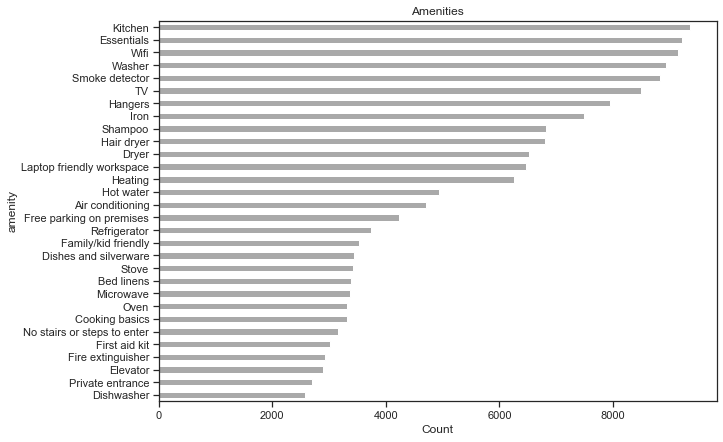

In [23]:
sub_df = pd.DataFrame(results.most_common(30), columns=['amenity', 'count'])
sub_df.sort_values(by=['count'], ascending=True).plot(kind='barh', x='amenity', y='count',  
                                                      figsize=(10,7), legend=False, color='darkgrey',
                                                      title='Amenities')
plt.xlabel('Count');

In [24]:
#Create dummy matrix
for item in sub_df['amenity']:
    data_train['{}'.format(item)] = data_train['amenities'].str.contains('{}'.format(item))
    
for item in sub_df['amenity']:
    data_test['{}'.format(item)] = data_test['amenities'].str.contains('{}'.format(item))


In [25]:
# Drop the columns can't be processed
col_to_drop = ['name','summary','space','experiences_offered','neighborhood_overview','notes','transit',
               'access','interaction','house_rules','host_id','host_since','host_location','host_about',
               'host_neighbourhood','street','neighbourhood','smart_location','first_review','last_review','zipcode','monthly_discount']
data_train = data_train.drop(columns = col_to_drop)
data_test = data_test.drop(columns = col_to_drop)

#### 2.4.2 Create dummy variable for categorical text data

In [26]:
get_dum_col = ['neighbourhood_cleansed','city','property_type','room_type','bed_type']
data_train_dummy= pd.get_dummies(data_train[get_dum_col], drop_first=True)
get_dum_col = ['neighbourhood_cleansed','city','property_type','room_type','bed_type']
data_test_dummy = pd.get_dummies(data_test[get_dum_col], drop_first=True)

In [27]:
#Ensure the dummy columns keep the same in train and test data
for item in data_test_dummy:
    if item not in data_train_dummy:
        data_test_dummy = data_test_dummy.drop(columns = '{}'.format(item))
for column in data_train_dummy:
    if column not in data_test_dummy:
        data_train_dummy = data_train_dummy.drop(columns = '{}'.format(column))
        print (column)

In [28]:
data_test_dummy.columns == data_train_dummy.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [29]:
#Join the dummy columns
data_train = data_train.drop(columns = get_dum_col)
data_train = data_train.join(data_train_dummy)
for col in data_train.columns:
    data_train.loc[data_train[col] == True,col]=1
    data_train.loc[data_train[col] == False,col]=0
    data_train.loc[data_train[col] == 't',col]=1
    data_train.loc[data_train[col] == 'f',col]=0
    

data_test = data_test.drop(columns = get_dum_col)
data_test = data_test.join(data_test_dummy)
for col in data_test.columns:
    data_test.loc[data_test[col] == True,col]=1
    data_test.loc[data_test[col] == False,col]=0
    data_test.loc[data_test[col] == 't',col]=1
    data_test.loc[data_test[col] == 'f',col]=0

#### 2.4.3 Description - tf-idf

In [30]:
# Use TF-IDF method to deal with 'description'
# Take the 200 most frequently occurring variables
from sklearn.feature_extraction.text import TfidfVectorizer
corpus=data_train['description']
train_vect = TfidfVectorizer(max_features = 200)
train_tfidf = train_vect.fit_transform(corpus).toarray()
train_tfidf_new_1= pd.DataFrame(train_tfidf, columns = train_vect.get_feature_names())

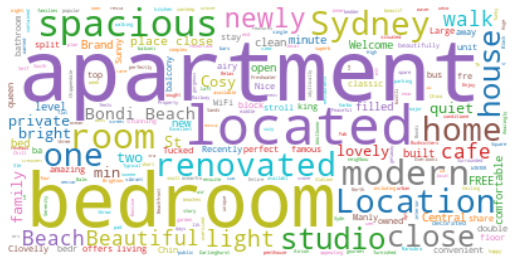

In [31]:
from wordcloud import WordCloud
#Visulaise the most common 200 words in description in train data
fig, ax = plt.subplots()
wordcloud = WordCloud(background_color="white", colormap='tab10', max_words=500).generate(str(corpus))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [32]:
#Do tf-idf analysis for test data
corpus_2=data_test['description']
test_vect = TfidfVectorizer(max_features = 200)
test_tfidf = test_vect.fit_transform(corpus_2).toarray()
test_tfidf_new_2= pd.DataFrame(test_tfidf, columns = test_vect.get_feature_names())

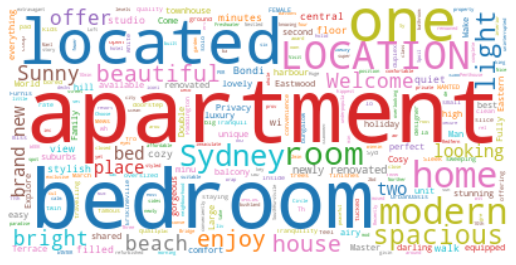

In [33]:
from wordcloud import WordCloud
#Visulaise the most common 200 words in description in test data
fig, ax = plt.subplots()
wordcloud = WordCloud(background_color="white", colormap='tab10', max_words=500).generate(str(corpus_2))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [34]:
#Pick the descriptive words from tf-idf
words = ['available','bars','bay','beach','beautiful','bondi','bright','bus','cafes','cbd','central','centre',
        'clean','close','coffee','comfortable','dining','double','equipped','family','friendly','garden','harbour',
        'lovely','modern','new','parking','perfect','pool','quiet','restaurants','shared','separate','shopping','spacious',
        'stop','station']

#Check if the words we pick are in test tf-idf analysis
for word in words:
    if word not in test_tfidf_new_2.columns:
        words.remove(word)
    
text_analysis_train= pd.DataFrame(train_tfidf_new_1[words])
data_train = data_train.join(text_analysis_train)
text_analysis_test = pd.DataFrame(test_tfidf_new_2[words])
data_test = data_test.join(text_analysis_test)

In [35]:
data_train.columns == data_test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

### 2.5 Continuous dtype transformation

### 2.5.1 Log transformation

In [36]:
#Get rid of non-numerical data
data_train = data_train.select_dtypes(exclude=['object'])
data_test = data_test.select_dtypes(exclude=['object'])

In [37]:
#Copy the train data before transformation for EDA
data_train_eda = data_train.join(y_train).copy()

In [38]:
#Ensure the value is positive to do log transformation
data_train['latitude'] = -data_train['latitude']
data_test['latitude'] = -data_test['latitude']

In [39]:
#Recognize continuous, discrete and binary data
continuous = []
discrete = []
dummy = []
for i in data_train.columns:
    if data_train[i].value_counts().shape[0] > 20:
        continuous.append(i)
    elif data_train[i].value_counts().shape[0] <= 2:
        dummy.append(i)
    else:
        discrete.append(i)

In [40]:
#Get the columns whose skewness > 0.1 in continuous data
skew_over0 = data_train[continuous].skew().sort_values()
skew_over0 = data_train[skew_over0.loc[(skew_over0 > 0.1)].index]
skew_over0.columns

Index(['host_days', 'maximum_nights_avg_ntm', 'availability_90',
       'availability_60', 'maximum_maximum_nights', 'availability_30',
       'availability_365', 'cleaning_fee_perc', 'restaurants', 'cafes',
       'beach', 'Distance to Central', 'Distance to TownHall', 'bus', 'dining',
       'quiet', 'close', 'available', 'spacious', 'modern', 'perfect',
       'beautiful', 'equipped', 'bondi', 'comfortable', 'reviews_per_month',
       'bars', 'pool', 'station', 'parking', 'double', 'coffee', 'harbour',
       'number_of_reviews_ltm', 'stop', 'new', 'family', 'garden', 'central',
       'centre', 'cbd', 'shopping', 'friendly', 'separate', 'clean', 'lovely',
       'bright', 'shared', 'number_of_reviews', 'bay',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'host_total_listings_count', 'host_listings_count', 'extra_people_perc',
       'security_deposit_perc', 'maximum_minimum_nights', 'minimum_nights',
       'minimum_nights_av

In [41]:
data_train[skew_over0.columns] = np.log(data_train[skew_over0.columns]+1)
data_test[skew_over0.columns] = np.log(data_test[skew_over0.columns]+1)
y_train = np.log(y_train)

### 2.5.2 Scaling

In [42]:
from sklearn.preprocessing import PowerTransformer, StandardScaler
from scipy.stats import skew 
from scipy import stats
from scipy.stats import skew
scaler = StandardScaler().fit(data_train[continuous])
data_train[continuous] = scaler.transform(data_train[continuous])
data_test[continuous] = scaler.transform(data_test[continuous])

# 3. Exploratory data analysis

### 3.1 Distribution

In [43]:
continuous_eda = []
discrete_eda = []
dummy_eda = []
for i in data_train_eda.columns:
    if data_train_eda[i].value_counts().shape[0] > 20:
        continuous_eda.append(i)
    elif data_train_eda[i].value_counts().shape[0] <= 2:
        dummy_eda.append(i)
    else:
        discrete_eda.append(i)

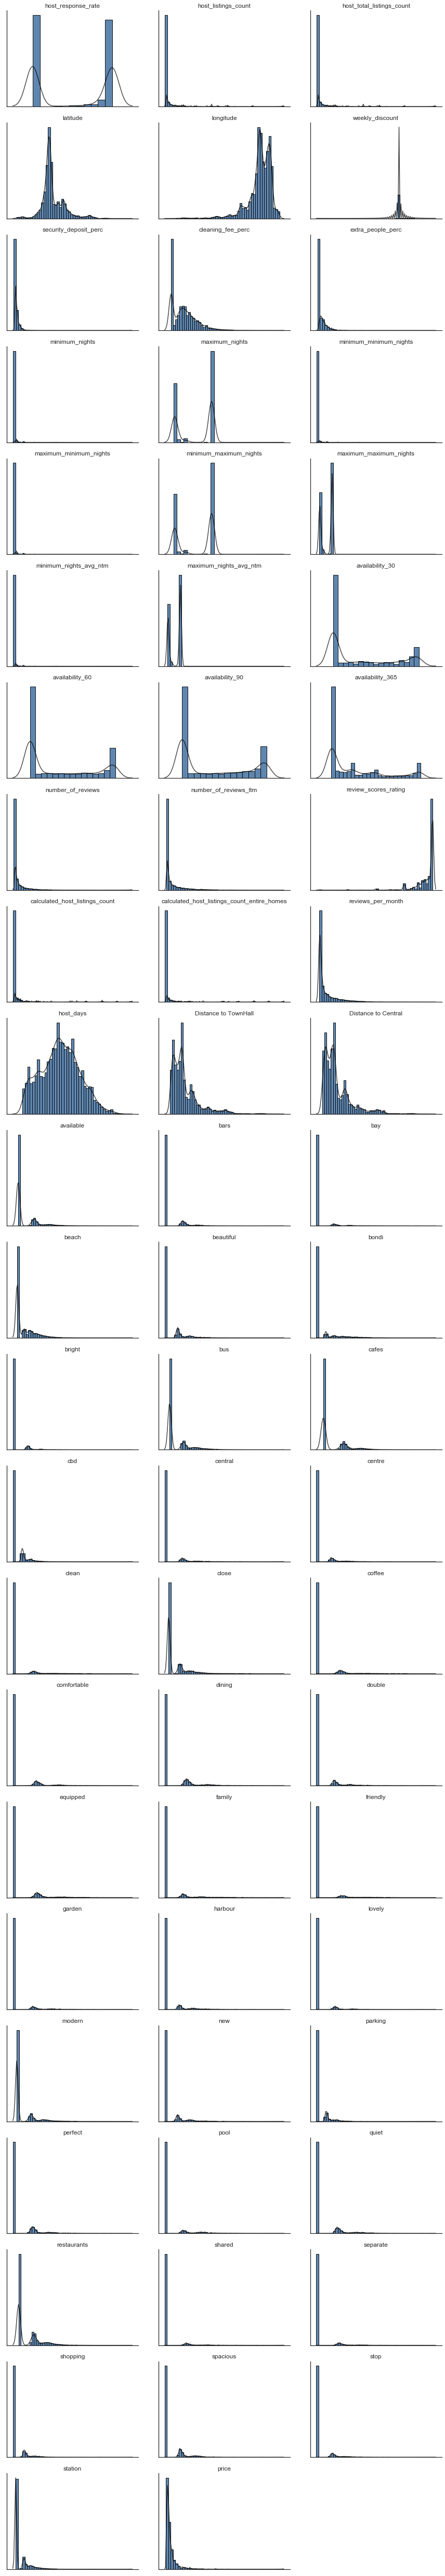

In [44]:
from statlearning import plot_dists
plot_dists(data_train_eda[continuous_eda]) 
plt.show()

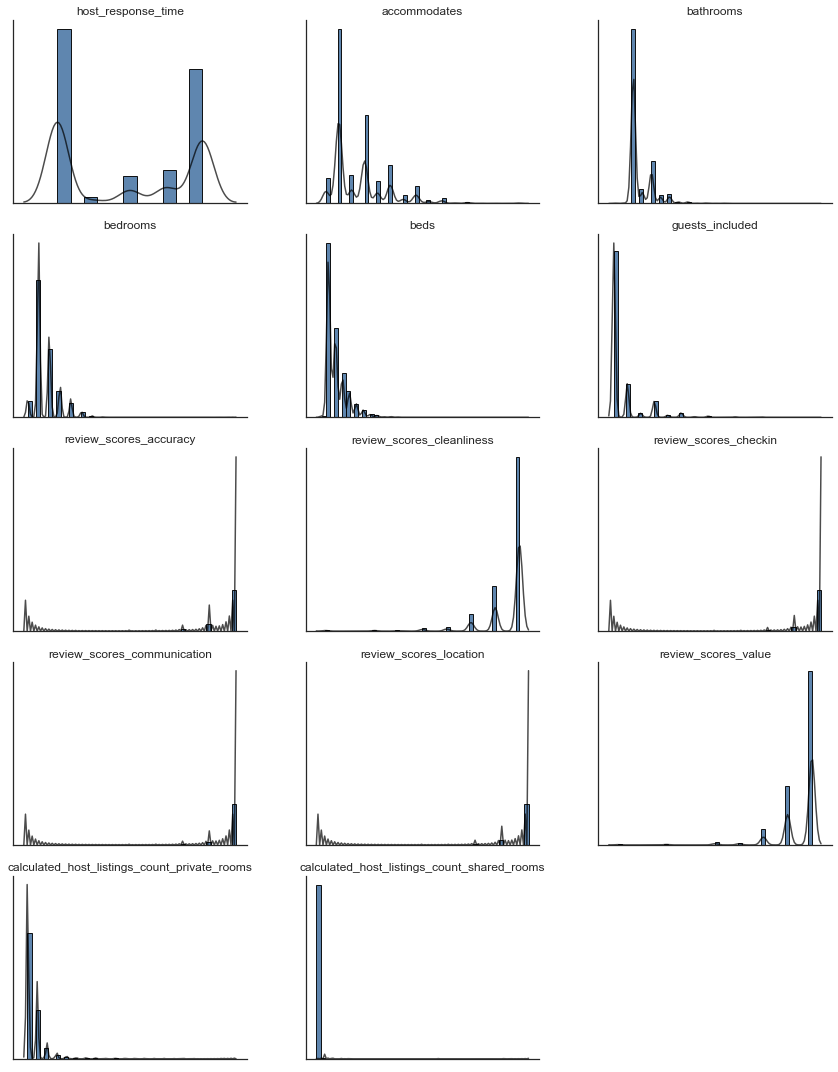

In [45]:
plot_dists(data_train_eda[discrete_eda]) 
plt.show()

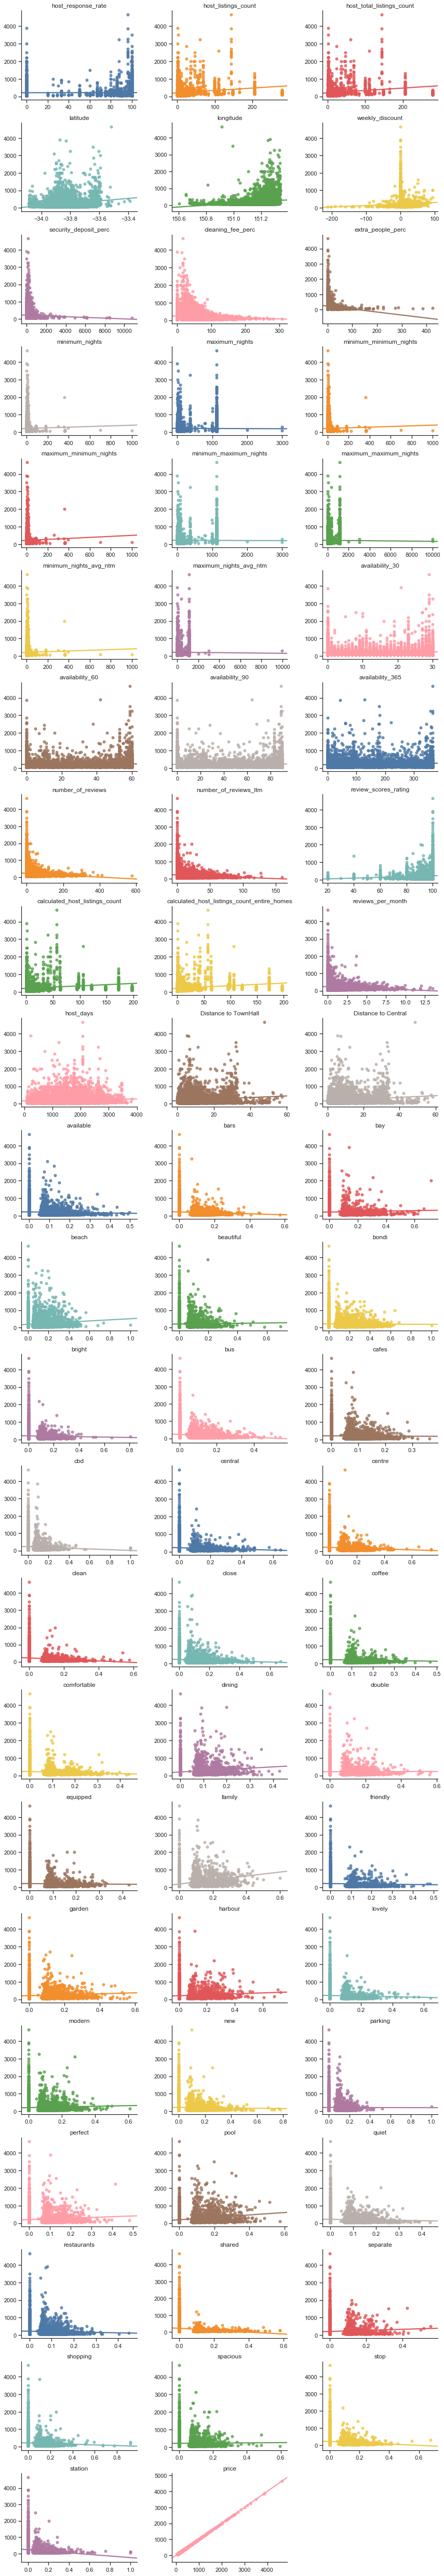

In [46]:
from statlearning import plot_regressions
plot_regressions(data_train_eda[continuous_eda],data_train_eda['price'])
plt.show()

In [47]:
#The text data from tf-idf analysis is not significant so we decide to drop most of them
text_train = data_train[words]
text_test = data_test[words]
data_train = data_train.drop(columns = words)
data_test = data_test.drop(columns = words)

In [48]:
data_train.columns == data_test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

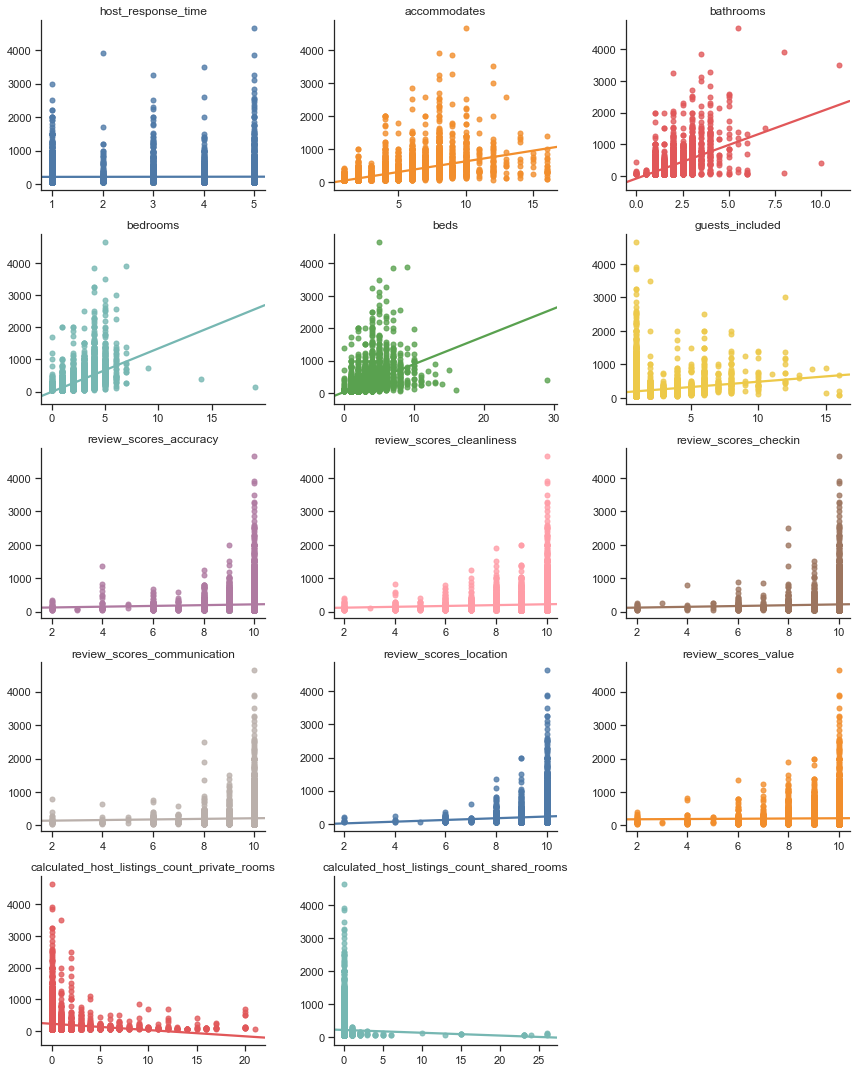

In [49]:
plot_regressions(data_train_eda[discrete_eda], data_train_eda['price'])
plt.show()

### 3.2 Correlation

In [50]:
corr = data_train_eda.corr()["price"].sort_values(ascending=False)
corr

price                                           1.00000
bedrooms                                        0.59917
bathrooms                                       0.58251
accommodates                                    0.57891
beds                                            0.53130
property_type_House                             0.28523
family                                          0.26006
neighbourhood_cleansed_Pittwater                0.21680
Free parking on premises                        0.20696
latitude                                        0.20058
Family/kid friendly                             0.18188
guests_included                                 0.18062
pool                                            0.17904
longitude                                       0.16896
host_listings_count                             0.16648
host_total_listings_count                       0.16648
Dryer                                           0.15587
dining                                          

<function matplotlib.pyplot.show(*args, **kw)>

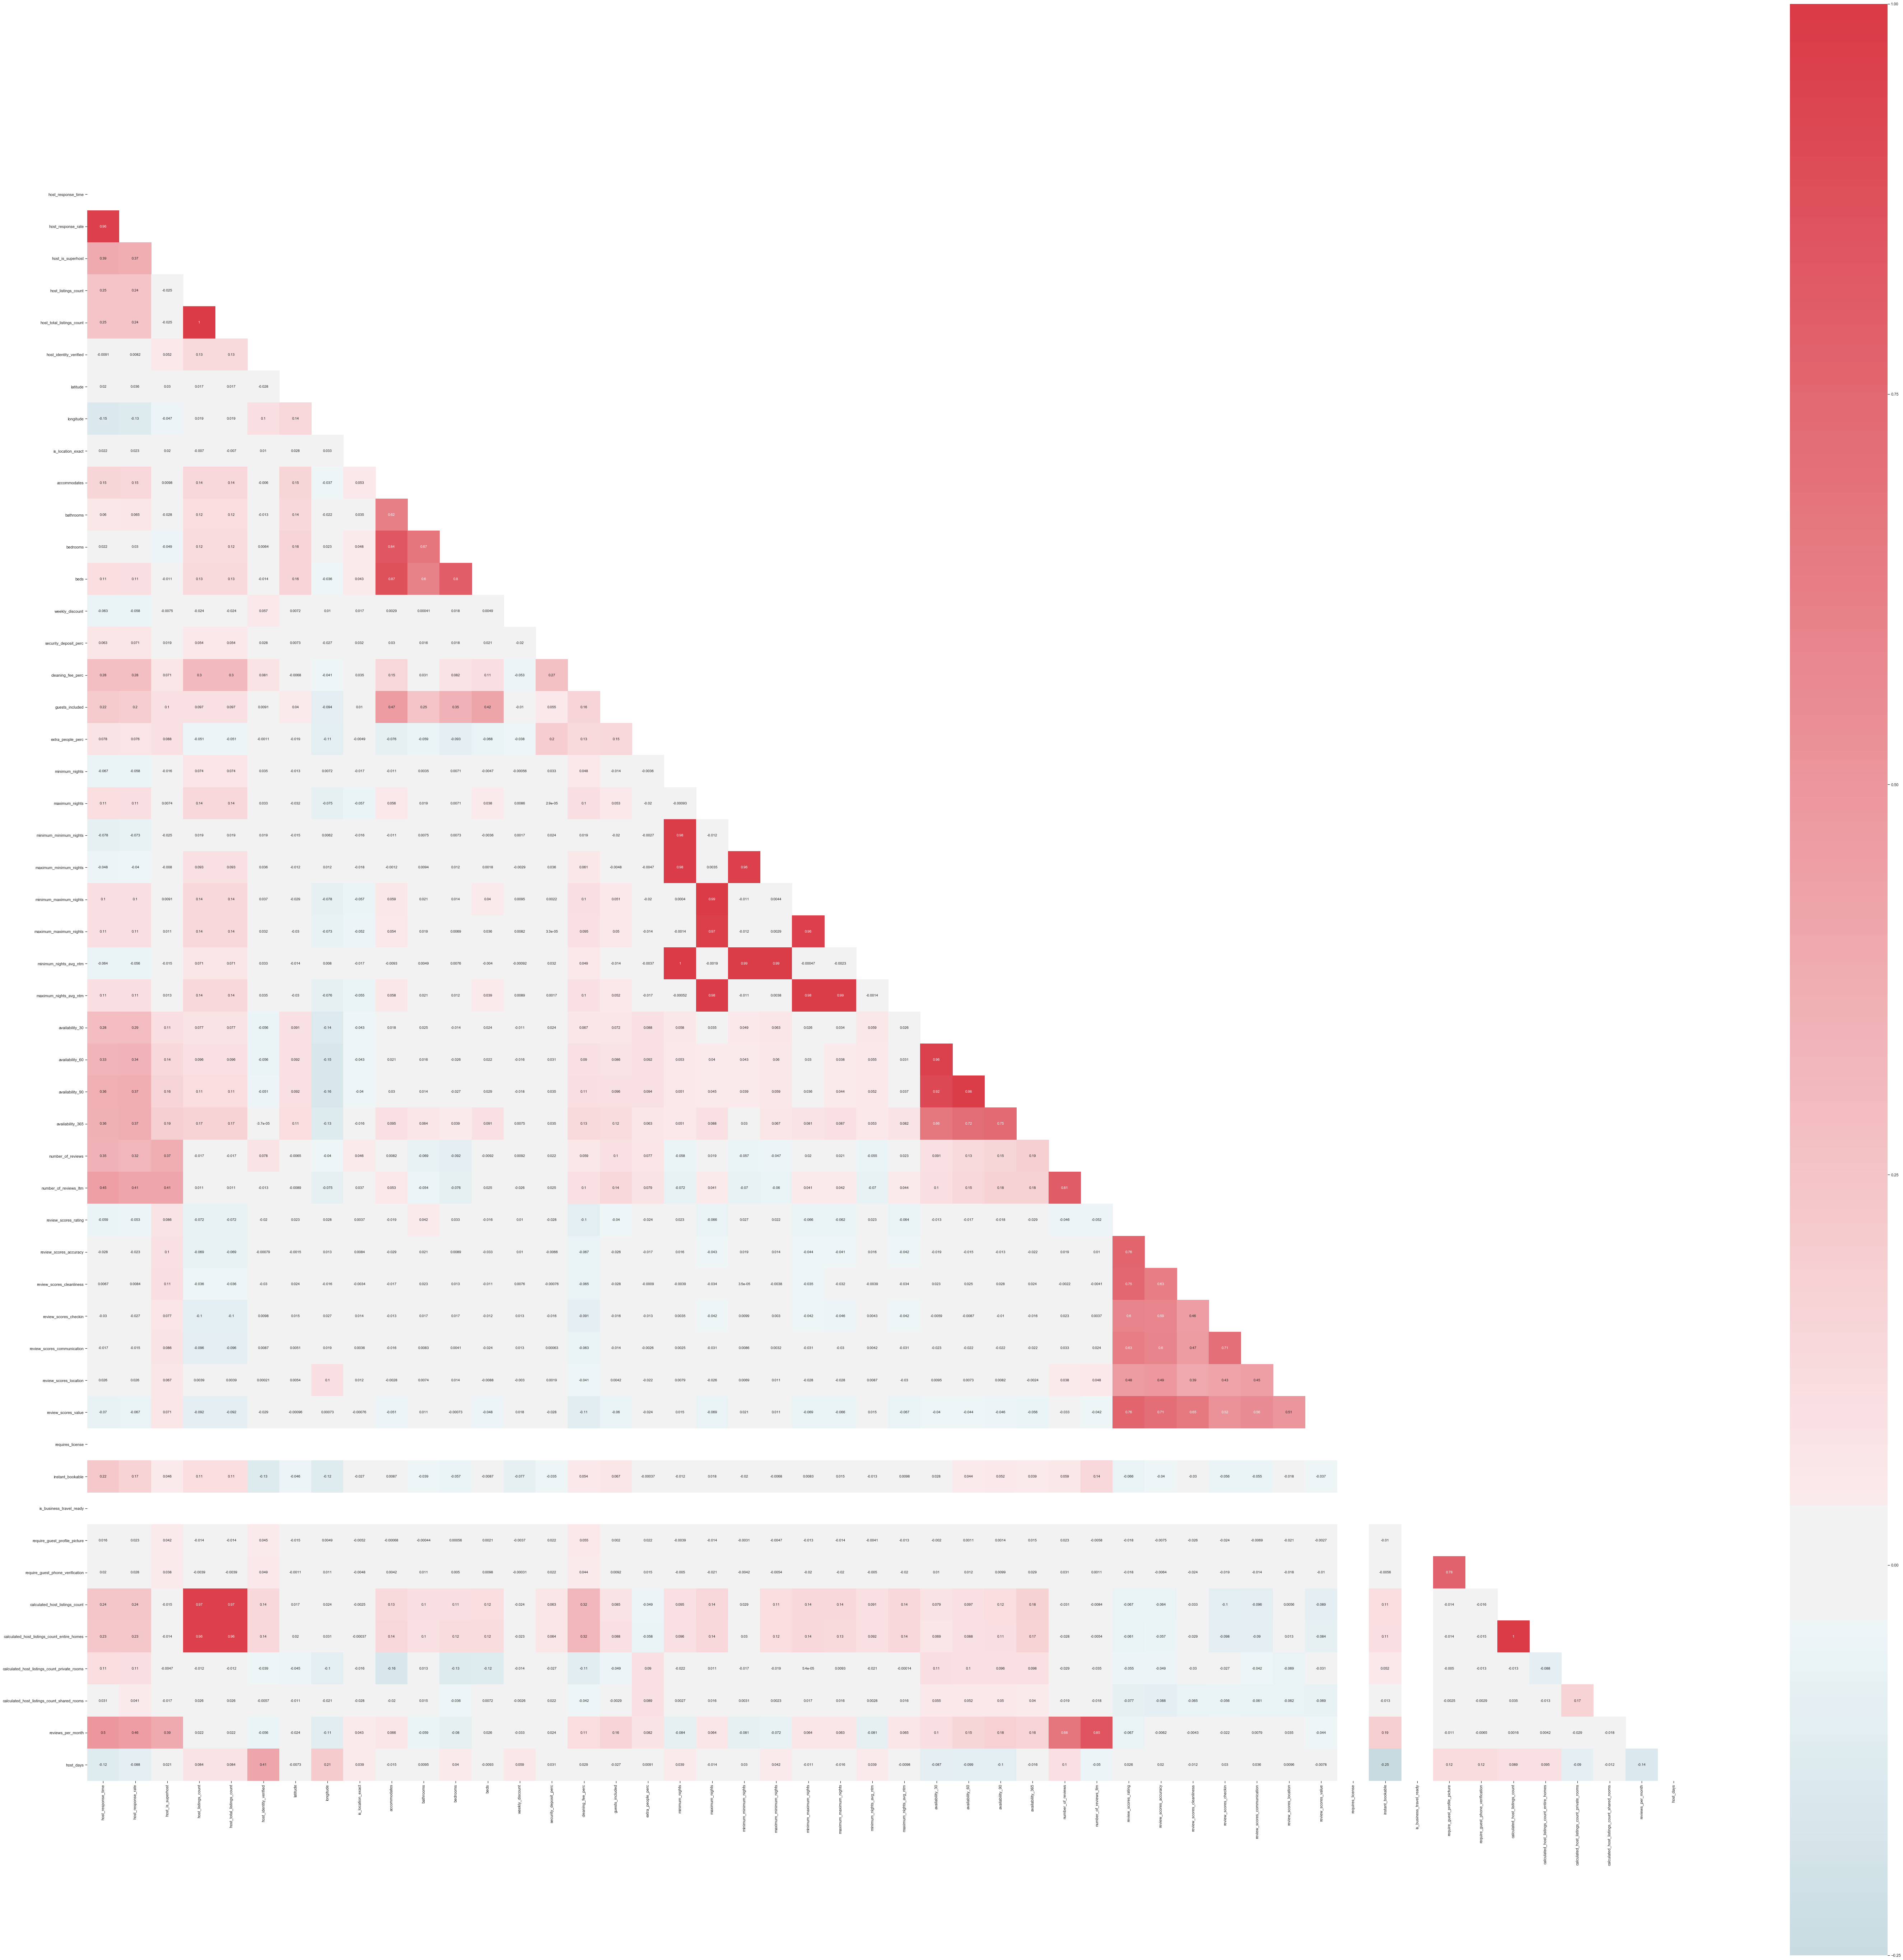

In [51]:
data_train_eda = data_train_eda.drop(columns = words)
corr_mat = data_train_eda.iloc[:,:50]
f, ax = plt. subplots(figsize=(100,100))
mask = np.zeros_like(corr_mat.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_mat.corr(),annot= True, cmap=cmap,mask=mask,center=0,
            square=True)
plt.savefig('corr.jpeg')
plt.show

### 2.3 Map

#### code from https://plot.ly/python/plotly-express/

In [52]:
from folium.plugins import HeatMap
latitude = -33.51
longitude = 151.2
# let's start again with a clean copy of the map of San Francisco
san_map = folium.Map(location = [latitude, longitude],radius=8, max_zoom=13,tiles='Stamen Toner')
# Convert data format
heatdata = data_train_eda[['latitude','longitude']].values.tolist()

# add incidents to map
HeatMap(heatdata).add_to(san_map)

san_map

In [53]:
token = 'pk.eyJ1Ijoic2IzMTEzMCIsImEiOiJjazI0Z2J5YWkxdW42M2lxd2FxeGw1cm1vIn0.Cek9dTZrKqanWctUeD-jDg'
import plotly.express as px
px.set_mapbox_access_token(token)
#carshare = px.data.carshare()
fig = px.scatter_mapbox(data_train_eda, lat="latitude", 
                        lon="longitude",  
                        size="price",   
                        color_continuous_scale=px.colors.carto.Tealrose, 
                        zoom=10,
                        title= 'Prices of Airbnb in different location',
)
fig.show()

# 4.Modeling

In [54]:
data_train = data_train.join(y_train)
from sklearn.model_selection import train_test_split, cross_val_predict
index_train, index_val = train_test_split(np.array(data_train.index), 
                                            train_size=0.9, random_state=5)
train_train = data_train.loc[index_train,:]
train_val = data_train.loc[index_val,:]
X_train = train_train.drop(columns = 'price')
y_train = train_train['price']
X_val = train_val.drop(columns = 'price')
y_val = train_val['price']

### 4.1 Regression

#### 4.1.1 Linear Regression

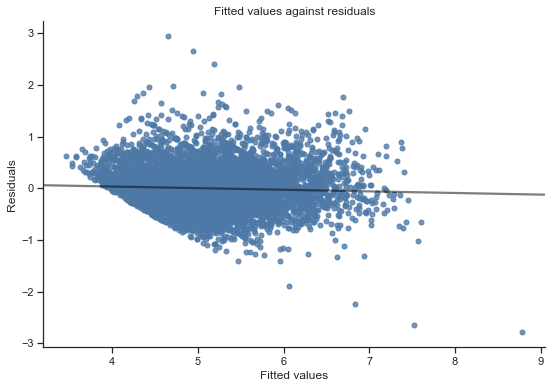

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,  mean_absolute_error
ols = LinearRegression()
ols.fit(X_train, y_train)

y_fitted = ols.predict(X_train)
resid = y_train - y_fitted
fig, ax = plt.subplots()
sns.regplot(y_fitted, resid, ci=None, scatter_kws={'s':25, 'color':crayon[0]}, 
            line_kws={'color':'black', 'alpha':0.5})
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')
ax.set_title('Fitted values against residuals')
sns.despine()
plt.show()

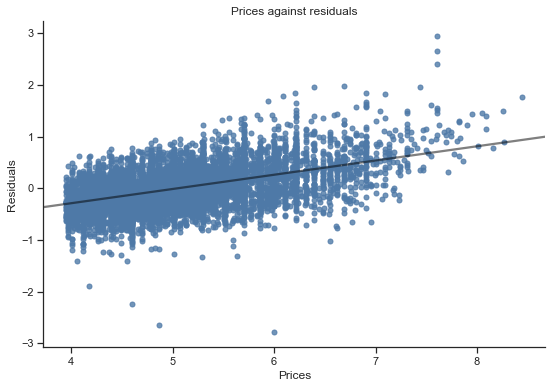

In [56]:
fig, ax = plt.subplots()
sns.regplot(y_train, resid, ci=None,  scatter_kws={'s':25, 'color':crayon[0]},
            line_kws={'color':'black', 'alpha':0.5})
ax.set_xlabel('Prices')
ax.set_ylabel('Residuals')
ax.set_title('Prices against residuals')
sns.despine()
plt.show()

#### 4.1.2 Lasso

In [57]:
%%time
from sklearn.linear_model import LassoCV
lasso = LassoCV(cv=10)
lasso.fit(X_train, y_train)

Wall time: 1.54 s


LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

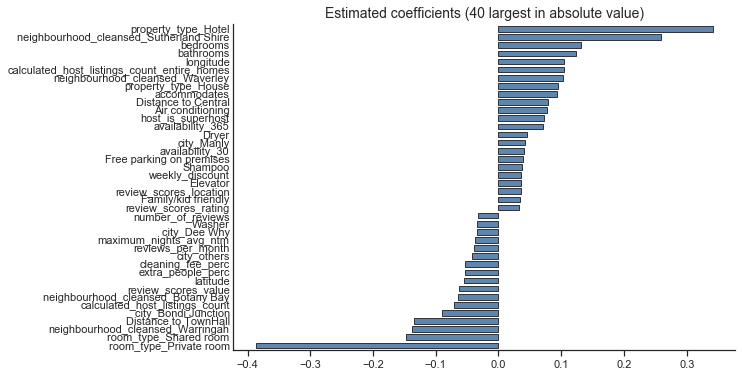

In [58]:
from statlearning import plot_coefficients
plot_coefficients(lasso,X_train.columns)
plt.show()

#### 4.1.3 Ridge

In [59]:
from sklearn.linear_model import RidgeCV

alphas = list(np.logspace(-15, 15, 151, base=2))
ridge = RidgeCV(alphas=alphas)
ridge.fit(X_train, y_train)

RidgeCV(alphas=array([3.05175781e-05, 3.50554918e-05, 4.02681858e-05, 4.62559987e-05,
       5.31341897e-05, 6.10351562e-05, 7.01109836e-05, 8.05363715e-05,
       9.25119975e-05, 1.06268379e-04, 1.22070312e-04, 1.40221967e-04,
       1.61072743e-04, 1.85023995e-04, 2.12536759e-04, 2.44140625e-04,
       2.80443934e-04, 3.22145486e-04, 3.70047990e-04, 4.25073517e-04,
       4.88281250e-04, 5.60887869e-0...
       2.70235220e+03, 3.10418753e+03, 3.56577511e+03, 4.09600000e+03,
       4.70506846e+03, 5.40470440e+03, 6.20837506e+03, 7.13155021e+03,
       8.19200000e+03, 9.41013692e+03, 1.08094088e+04, 1.24167501e+04,
       1.42631004e+04, 1.63840000e+04, 1.88202738e+04, 2.16188176e+04,
       2.48335002e+04, 2.85262009e+04, 3.27680000e+04]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring=None, store_cv_values=False)

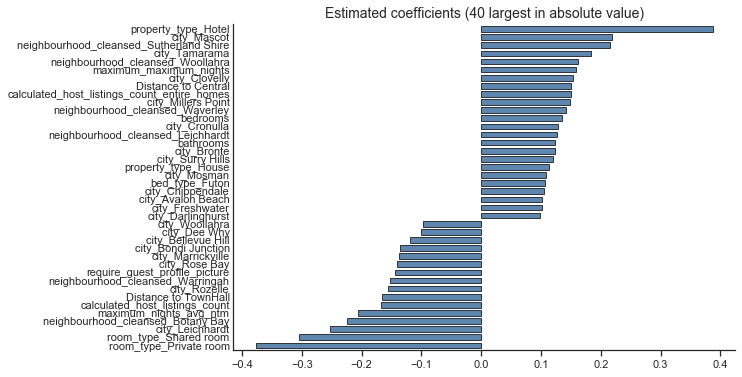

In [60]:
from statlearning import plot_coefficients
plot_coefficients(ridge, X_train.columns)
plt.show()

### 4.2 Tree-based Models

#### 4.2.1 Gradient Boosting Machines

In [61]:
%%time
#3 hours to run GridSearch
#best parameter :{'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 1000, 'subsample': 0.8}
from sklearn.model_selection import GridSearchCV

gb_model = GradientBoostingRegressor(learning_rate=0.5,max_depth=4,n_estimators=1000,subsample=0.8)

tuning_parameters = {

    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators' : [250, 500, 750, 1000, 1500],
    'max_depth' : [2 ,3, 4],
    'subsample' : [0.6, 0.8, 1.0]
}

# Using GridSearchCV would be too slow. Increase the number of iterations to explore more hyperparameter combinations.
#gb_search = GridSearchCV(gb_model,tuning_parameters,cv = 10, return_train_score=False, n_jobs=-1)
gb_model.fit(X_train, y_train)

#print('Best parameters found by randomised search:', gb_search.best_params_, '\n')

Wall time: 2min 2s


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.5, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=0.8, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

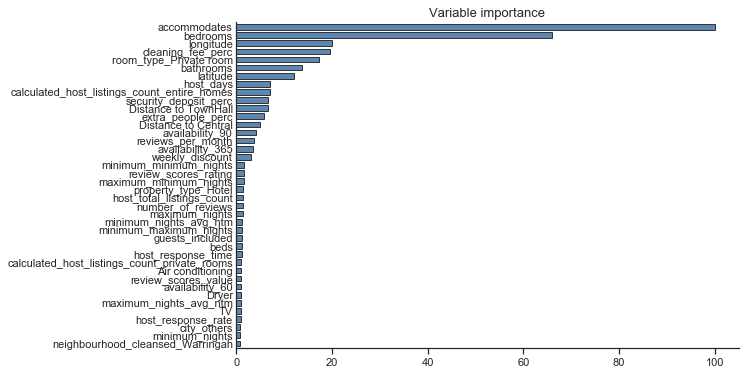

In [62]:
from statlearning import plot_feature_importance

plot_feature_importance(gb_model, X_train.columns)
plt.savefig("boosting.png")
plt.show()

#### 4.2.2 Bootstrap Aggregating

In [63]:
%%time
from sklearn.ensemble import BaggingRegressor
bag_model = BaggingRegressor(n_estimators=1000, random_state=1)
bag_model.fit(X_train, y_train)

Wall time: 7min 29s


BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=1000,
                 n_jobs=None, oob_score=False, random_state=1, verbose=0,
                 warm_start=False)

#### 4.2.3 LightGBM

In [64]:
%%time
# 9 hours to run GridSearch
#best parameter: {'learning_rate': 0.05,'n_estimators': 750,'num_leaves': 24,'subsample': 0.6}
lbst_model = lgb.LGBMRegressor(learning_rate= 0.05,n_estimators= 750,num_leaves= 24,subsample=0.6,objective='regression')

tuning_parameters = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators' : [250, 500, 750, 1000, 1500, 2000],
    'num_leaves' : list(np.arange(2, 64)),
    'subsample' : [0.6, 0.8, 1.0],
}


#lbst = GridSearchCV(model, tuning_parameters, cv = 5, n_jobs=-1)
lbst_model.fit(X_train, y_train)

#print('Best parameters found by randomised search:', lbst.best_params_, '\n')


Wall time: 5.3 s


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.05, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=750, n_jobs=-1, num_leaves=24,
              objective='regression', random_state=None, reg_alpha=0.0,
              reg_lambda=0.0, silent=True, subsample=0.6,
              subsample_for_bin=200000, subsample_freq=0)

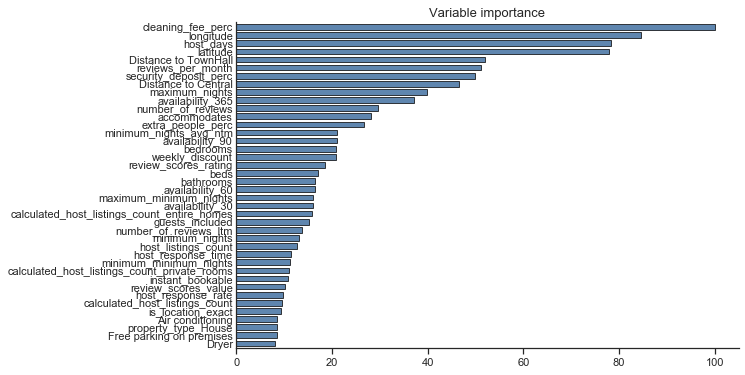

In [65]:
from statlearning import plot_feature_importance

plot_feature_importance(lbst_model, X_train.columns)
plt.savefig("lightgbm.png")
plt.show()

#### 4.2.4 XGBoost

In [66]:
%%time
# 9 hours to run GridSearch
# Best parameter {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 1000, 'subsample': 0.8} 
np.random.seed(0)
xbst = xgb.XGBRegressor(learning_rate= 0.05, max_depth= 4,n_estimators= 1000,subsample=0.8,objective='reg:squarederror', reg_lambda=0)

tuning_parameters = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators' : [250, 500, 750, 1000, 1500, 2000],
    'max_depth' : [2,3,4],
    'subsample' : [0.6, 0.8, 1.0]
}

#xbst = GridSearchCV(model, tuning_parameters, cv = 5,  n_jobs=-1)
xbst.fit(X_train,y_train)

#print('Best parameters found by gridsearch:', xbst.best_params_, '\n')

Wall time: 2min 16s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=0, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.8, verbosity=1)

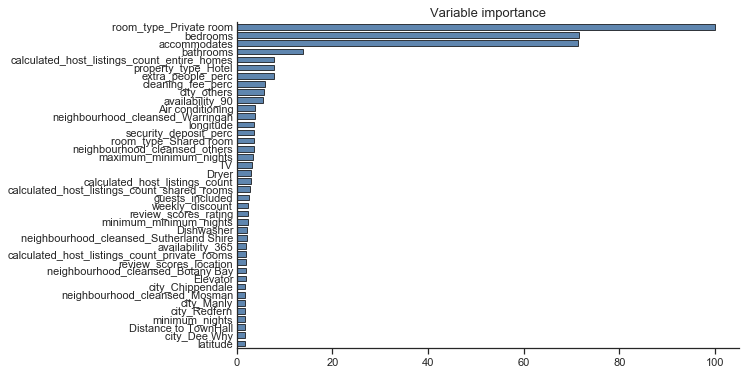

In [67]:
xgb_model = xgb.XGBRegressor(learning_rate = 0.05, max_depth =4, n_estimators =1000, subsample =0.8,objective='reg:squarederror', reg_lambda=0)
xgb_model.fit(X_train,y_train)
plot_feature_importance(xgb_model, X_train.columns)
plt.savefig("xgb.png")
plt.show()

### 4.3 Stack

#### 4.3.1 Mega Regressor: LinearRegression

In [68]:
%%time
from mlxtend.regressor import StackingCVRegressor
from sklearn.linear_model import LinearRegression
xgb_model_1 = xgb.XGBRegressor(learning_rate = 0.05, max_depth =4, n_estimators =1000, subsample =0.8,objective='reg:squarederror', reg_lambda=0)
gb_model_1 = GradientBoostingRegressor(learning_rate=0.5,max_depth=4,n_estimators=1000,subsample=0.8)
lbst_model_1 = lgb.LGBMRegressor(learning_rate= 0.05,n_estimators= 750,num_leaves= 24,subsample=0.6,objective='regression')
ols_1 = LinearRegression()
lasso_1 = LassoCV(cv=10)
xbst_1 = xgb.XGBRegressor(learning_rate= 0.05, max_depth= 4,n_estimators= 1000,subsample=0.8,objective='reg:squarederror', reg_lambda=0)
models = [xgb_model_1,gb_model,lasso_1,ols_1,lbst_model_1,ridge,xbst_1]

stack_1 = StackingCVRegressor(models, meta_regressor = LinearRegression(), cv=5)
stack_1.fit(X_train, y_train)

Wall time: 29min 21s


StackingCVRegressor(cv=5,
                    meta_regressor=LinearRegression(copy_X=True,
                                                    fit_intercept=True,
                                                    n_jobs=None,
                                                    normalize=False),
                    n_jobs=None, pre_dispatch='2*n_jobs', random_state=None,
                    refit=True,
                    regressors=[XGBRegressor(base_score=0.5, booster='gbtree',
                                             colsample_bylevel=1,
                                             colsample_bynode=1,
                                             colsample_bytree=1, gamma=0,
                                             importance_type='gain',
                                             learning_rate=0.05,
                                             max...
                                             importance_type='gain',
                                             learning_

#### 4.3.2 Mega Regressor: BaggingRegressor

In [69]:
stack_2 = StackingCVRegressor(models, meta_regressor = BaggingRegressor(n_estimators=1000, random_state=1), cv=5)
stack_2.fit(X_train, y_train)

StackingCVRegressor(cv=5,
                    meta_regressor=BaggingRegressor(base_estimator=None,
                                                    bootstrap=True,
                                                    bootstrap_features=False,
                                                    max_features=1.0,
                                                    max_samples=1.0,
                                                    n_estimators=1000,
                                                    n_jobs=None,
                                                    oob_score=False,
                                                    random_state=1, verbose=0,
                                                    warm_start=False),
                    n_jobs=None, pre_dispatch='2*n_jobs', random_state=None,
                    refit=True,
                    regressors=[XGBRegressor(base_score=0.5, booste...
                                             importance_type='gain',
            

# 5. Model Evaluation

In [70]:
# Train dataset
columns=['Train RMSE', 'R-squared', 'Train MAE']
rows=[ 'Linear Regression', 'Lasso','Ridge','GBM','Bagging','LightGBM','XGBoosting','Stack1','Stack2']
results=pd.DataFrame(0.0, columns=columns, index=rows) 

methods=[ols, lasso, ridge, gb_model, bag_model, lbst_model,xbst,stack_1,stack_2]

for i, method in enumerate(methods):

    if method == stack_1:
        y_est=method.predict(X_train.values)
    elif method == stack_2:
        y_est=method.predict(X_train.values)
    else:
        y_est=method.predict(X_train)
    
    results.iloc[i,0] = np.sqrt(mean_squared_error(y_train, y_est))
    results.iloc[i,1] = r2_score(y_train, y_est)
    results.iloc[i,2] = mean_absolute_error(y_train, y_est)

results.round(3)

Train RMSE  R-squared  Train MAE
Linear Regression     0.39000    0.70100    0.29600
Lasso                 0.38300    0.71100    0.28800
Ridge                 0.37600    0.72200    0.28200
GBM                   0.03200    0.99800    0.02400
Bagging               0.12600    0.96900    0.09300
LightGBM              0.17800    0.93800    0.13000
XGBoosting            0.20400    0.91900    0.15500
Stack1                0.18100    0.93500    0.13600
Stack2                0.19900    0.92200    0.15100

In [71]:
# Validation dataset
columns=['Test RMSE', 'R-squared', 'Test MAE']
rows=[ 'Linear Regression', 'Lasso','Ridge','GBM','Bagging','LightGBM','XGBoosting','Stack1','Stack2']
results=pd.DataFrame(0.0, columns=columns, index=rows) 

methods=[ols, lasso, ridge, gb_model, bag_model, lbst_model,xbst,stack_1,stack_2]

for i, method in enumerate(methods):
    if method == stack_1:
        y_pred=method.predict(X_val.values)
    elif method == stack_2:
        y_pred=method.predict(X_val.values)
    else:
        y_pred=method.predict(X_val)
    
    results.iloc[i,0] = np.sqrt(mean_squared_error(y_val, y_pred))
    results.iloc[i,1] = r2_score(y_val, y_pred)
    results.iloc[i,2] = mean_absolute_error(y_val, y_pred)

results.round(3)

Test RMSE  R-squared  Test MAE
Linear Regression    0.39300    0.68600   0.30500
Lasso                0.38100    0.70400   0.29500
Ridge                0.37700    0.71100   0.29100
GBM                  0.38100    0.70500   0.29000
Bagging              0.32800    0.78100   0.24800
LightGBM             0.30300    0.81300   0.22500
XGBoosting           0.30300    0.81300   0.22500
Stack1               0.30000    0.81700   0.22100
Stack2               0.30900    0.80500   0.23400

# 6. Model Selection

In [72]:
#Lasso for data mining
X_lasso = data_train.join(text_train)
X_lasso = X_lasso.drop(columns = 'price')
y_lasso = data_train['price']
lasso.fit(X_lasso, y_lasso)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

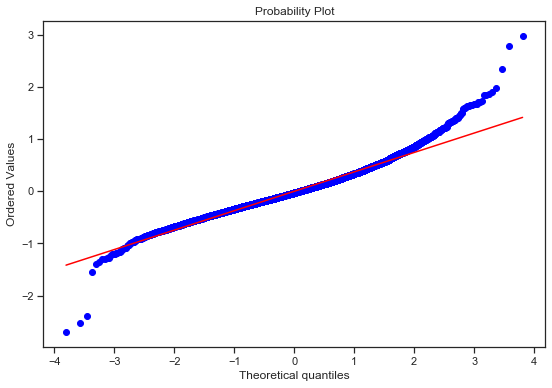

In [73]:
import pylab 
import scipy.stats as stats
y_fitted = lasso.predict(X_lasso)
resid = y_lasso - y_fitted
stats.probplot(resid, dist="norm", plot=pylab)
plt.savefig('QQplot_lasso.png')
pylab.show()

Text(0.5, 0, 'Coefficients importance')

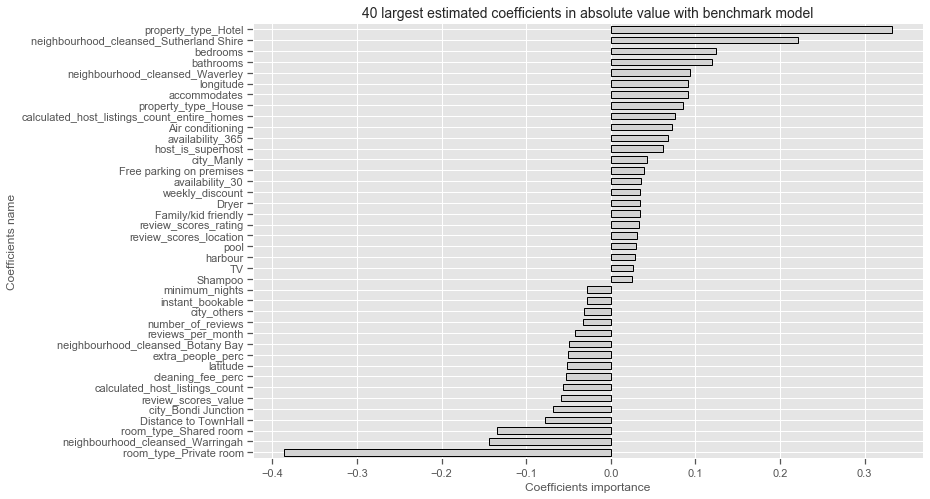

In [74]:
coef = lasso.coef_
table = pd.Series(coef.ravel(), index= X_lasso.columns).sort_values(ascending=True)
reference = pd.Series(np.abs(coef.ravel()), index = X_lasso.columns).sort_values(ascending=False, inplace=False)[:40]
table = table[reference.index].sort_values(ascending=True, inplace=False)
plt.style.use('ggplot')
fig, ax = fig, ax = plt.subplots(figsize = (12,8))
table.T.plot(kind='barh', edgecolor='black', width=0.6, linewidth= 1, ax=ax,color = 'lightgrey')
#ax.patches[-1].set_color('b')
ax.set_title('40 largest estimated coefficients in absolute value with benchmark model', fontsize=14)
ax.set_ylabel('Coefficients name')
ax.set_xlabel('Coefficients importance')